In [17]:
from utils import download_cutout_from_zarr

cutout = download_cutout_from_zarr(
    zarr_url="http://bigkahuna.corp.alleninstitute.org/ACdata/hpc/exaspim_ome_zarr/H17_PO12_S4_20250501/exaSPIM.zarr/Pos2/", # copy the url from the image source
    center=(20327, 29162, 1608), # at mip0, copy directly from NG link
    size=(1280, 1280, 1280), # at mip0
    out_path="cutout.npy",
    mip="1",  # Specify the dataset key if needed
    offset=(0,21279,-1) # under the source of the image
)

Opening TensorStore...
Global center=(20327, 29162, 1608), Offset=[    0 21279    -1], Local center=[10163  3941   804]
Clipped start=[9843, 3621, 484], stop=[10483, 4261, 1124], shape=[640, 640, 640]
Dataset shape: zyx = (21860, 7096, 1330)
Saving cutout to cutout.npy with shape (640, 640, 640)


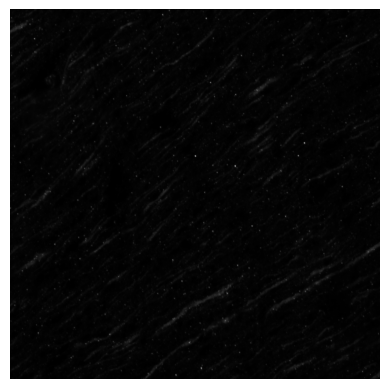

In [16]:
# visulize the midplane of the cutout

import numpy as np
import matplotlib.pyplot as plt
midplane = cutout[:, :, cutout.shape[2] // 2]  # Get the midplane along the z-axis
plt.imshow(midplane, cmap='gray')
plt.axis('off')
plt.show()
